In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *
import torch
import skimage
from PIL import Image

In [3]:
def es_correcta(imagen): return imagen[0] == 'B'

In [4]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3/Completo')
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.3, bs=10, seed=42,
    label_func=es_correcta
)

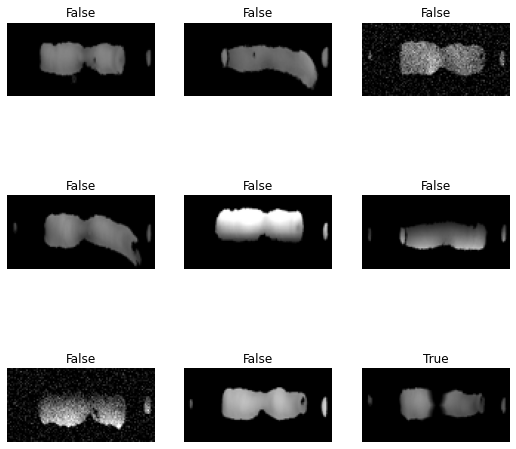

In [5]:
dls.show_batch()

In [6]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=1.9054607491852948e-06)

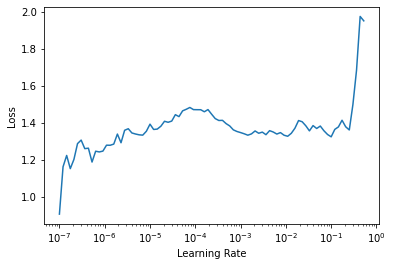

In [7]:
learn.lr_find()

In [8]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.289788,0.272447,0.909897,00:54


epoch,train_loss,valid_loss,accuracy,time
0,0.232418,0.203655,0.918768,01:33
1,0.181542,0.157237,0.918768,01:35
2,0.175834,0.151530,0.918768,01:36


In [10]:
from fastai.callback.tensorboard import TensorBoardProjectorCallback
import random

In [13]:
import tensorboard as tb
import random

In [20]:
path = Path('/home/yani/Pruebas TFG/DatasetConIncorrectas/Tipo3/Completo')
imagenes = get_image_files(path)
random.shuffle(imagenes)
imagenes = imagenes[:200]
dl = learn.dls.test_dl(imagenes, with_labels=True)

In [21]:
cbs = [TensorBoardProjectorCallback(log_dir='runs/')]

In [22]:
_ = learn.get_preds(dl=dl, cbs=cbs)

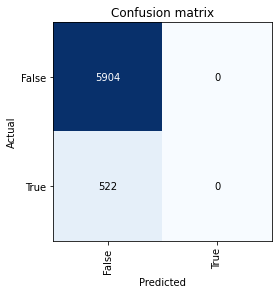

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Resultado obtenido en TensorBoard
![title](imgs/TensorBoard.png)